When comparing images, the **Mean Squared Error** (or MSE), though straightforward to calculate,
may not be a very good indicator of their *perceived* similarity.

The **Structural Similarity Index** (or SSIM) aims to address this shortcoming by taking texture
into account, and assigning a higher score to images that may *appear* similar.

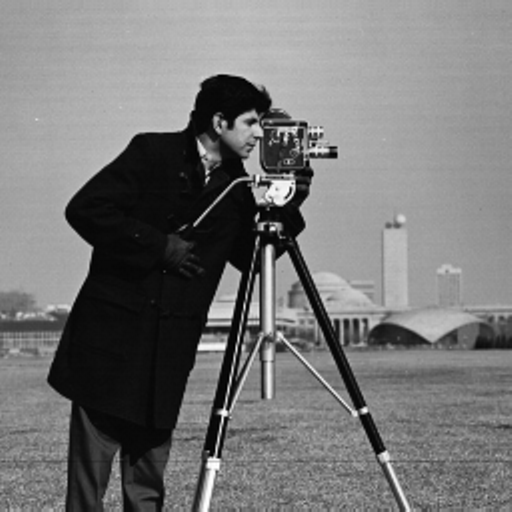

In [1]:
using Images, TestImages
using Random

img_orig = float64.(testimage("cameraman"))

We use a grayscale image out of the `TestImages` package, which provides a
standard suite of test images. `float`/`float32`/`float64` preserve colorant
information: thus the image is now composed of pixels of type `Gray{Float64}`.

In [2]:
assess_ssim(img_orig, img_orig)

1.0

The `assess_ssim` function, which takes two images as inputs and returns their
structural similarity index, is the simplest way to calculate the SSIM of two images.

An SSIM score of `1.00` indicates perfect structural similarity, as is expected
out of identical images.

Now, we create two variations of the original image: `image_const` on the left has the intensity of
all its pixels increased by `0.2` times the intensity range, while `image_noise` on the right has the
intensity of some of its pixels increased, and that of the others decreased by the same
amount. The two images look quite different visually.

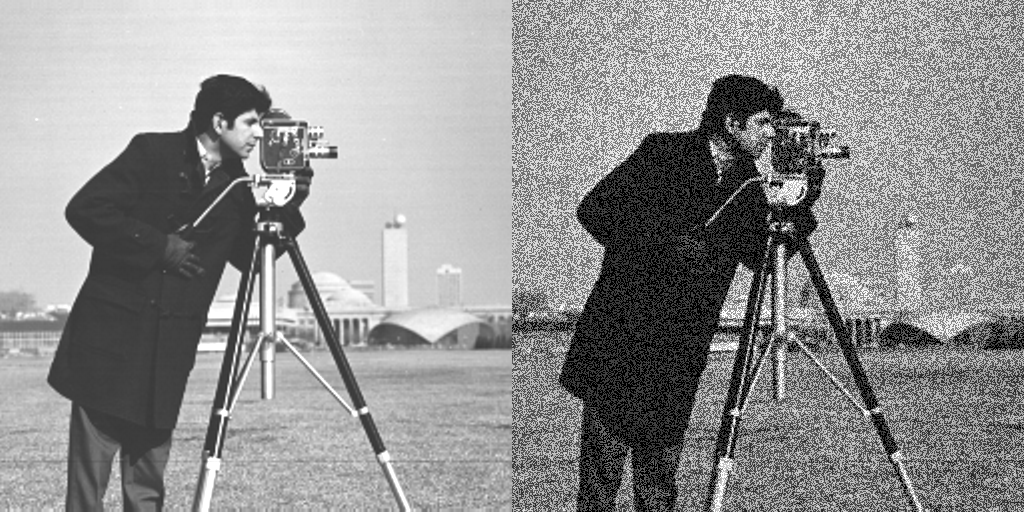

In [3]:
noise = ones(size(img_orig)) .* 0.2 .* (maximum(img_orig) - minimum(img_orig))
img_const = img_orig + noise

mask = rand(Float64, size(img_orig)) .< 0.5
noise[mask] = noise[mask] .* -1
img_noise = img_orig + noise

mosaicview(img_const, img_noise; nrow=1)

We use the `mse` funtion defined in `ImageDistances` to calculate the mean squared
error between the original and the two modified images.

In [4]:
mse(img_orig, img_const), mse(img_orig, img_noise)

(0.039999999999999016, 0.039999999999999016)

Despite their visual differences, both the images have the exact same mean squared error
of `0.400`, when compared with the original. This demonstrates how in certain cases, MSE
can fail to capture the *perceived* similarity of images.

In [5]:
assess_ssim(img_orig, img_const), assess_ssim(img_orig, img_noise)

(0.8406360281731596, 0.10527425498785123)

Their SSIM scores vary significantly, with `image_const` being rated much closer
to the original image in terms of perceived similarity, which is in line with what
visually seems to be the case.

### Custom Parameters

While `assess_ssim` is a convenient way to calculate the SSIM of two images, it
does not allow for custom parameters to be passed to the SSIM algorithm, for which
we have the following syntax.

In [6]:
iqi = SSIM(KernelFactors.gaussian(2.0, 11), (0.5, 0.5, 0.5))
assess(iqi, img_orig, img_const)

0.9085673404877024

Here, the first parameter is the kernel used to weight the neighbourhood of each
pixel while calculating the SSIM locally, and defaults to `KernelFactors.gaussian(1.5, 11)`.
The second parameter is the set of weights (α, β, γ) given to the *lunimance* (L),
*contrast* (C) and *structure* (S) terms while calculating the SSIM,
and defaults to `(1.0, 1.0, 1.0)`.
Recall that SSIM is defined as Lᵅ × Cᵝ × Sᵞ.

### References
1. Zhou Wang; Bovik, A.C.; ,”Mean squared error: Love it or leave it? A new look at Signal Fidelity Measures,” Signal Processing Magazine, IEEE, vol. 26, no. 1, pp. 98-117, Jan. 2009.
2. Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, “Image quality assessment: From error visibility to structural similarity,” IEEE Transactions on Image Processing, vol. 13, no. 4, pp. 600-612, Apr. 2004.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*